---

# NASDAQ 100 Stocks Movement Predictor - Exploratory Data Analysis (EDA) 2 

**Author:** Renish Kanjiyani <br>
**Notebook:** EDA - 2 <br>
**Date:** 05/11/2023 <br>

---

# Table of Contents:

## 1. [Introduction](#1)

## [2. EDA Part 2](#2)

### [2.1 Importing Packages & Dataset](#2.1)

### [](#2.2)

### [](#2.3)

### [](#2.4)

### []()

### []()

## [3. Conclusion](#3)


---

<a id=1></a>
## Introduction:

---

<a id=2></a>
## EDA (Part 2):

#### In this book we will be focusing on improving from our very first logistic model that we ran in our modelling notebook. The model we ran was based upon the `aapl_stocks` dataframe. We will now work through our original dataframe once again. 

<a id=2.1></a>
### Importing Packages & Dataset

In [2]:
# Import all the necessary packages we need 

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

#Importing library for downsampling

from sklearn.utils import resample

# Avoid viewing warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load our original dataset 

df = pd.read_csv('../nasdaq_stocks_100.csv', sep='\t')

In [4]:
# Viewing the first 5 rows in our dataset 

df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,AAPL
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,AAPL
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,AAPL
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,AAPL
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,AAPL


In [5]:
# Viewing the shape of our dataframe

df.shape

(271680, 8)

In [6]:
# Printing the rows and columns 

print(f"Our dataframe has {df.shape[0]} rows and {df.shape[1]} columns.")

Our dataframe has 271680 rows and 8 columns.


<a id=2.1></a>
### Desired Features

- In our modelling book 4 we applied our logistic regression on the specific dataset that contained information on the stock prices of `Apple` only. Despite getting a score of over 50% we realized that the dataset is too small to work with and can cause problems moving forward when working with advanced models

- Therefore what we will do now is take the entire dataframe again, we will drop the `Name` and `Date` column and perform a logistic regression on the data. Now we will be working with a much larger dataset. The only change would be that instead of looking at individual stocks we will now be looking at all stocks at once. Therefore prediciting movement of all instead one specifically. 

In [7]:
# Let's view the information on our original dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271680 entries, 0 to 271679
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       271680 non-null  object 
 1   Open       271680 non-null  float64
 2   High       271680 non-null  float64
 3   Low        271680 non-null  float64
 4   Close      271680 non-null  float64
 5   Adj Close  271680 non-null  float64
 6   Volume     271680 non-null  int64  
 7   Name       271680 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 16.6+ MB


In [8]:
# Let's drop the columns that we do not need 

df = df.drop(['Date', 'Name'], axis=1)

In [9]:
# Sanity Check 

df.head(5)

,Open,High,Low,Close,Adj Close,Volume
0,7.622500,7.660714,7.585000,7.643214,6.562591,493729600
1,7.664286,7.699643,7.616071,7.656429,6.573935,601904800
2,7.656429,7.686786,7.526786,7.534643,6.469369,552160000
3,7.562500,7.571429,7.466071,7.520714,6.457407,477131200
4,7.510714,7.571429,7.466429,7.570714,6.500339,447610800


Now that we dropped our `Name` and `Date` columns we can go ahead and create our desired columns. In this case we are recreating the `Adj Closing Yday` column using the `shift` function which we are applying to our `Adj Close` column. 

In [10]:
# Let's create our columns 

df['Adj Closing Yday'] = df['Adj Close'].shift(1)

In [11]:
# Sanity Check 

df.head(5)

,Open,High,Low,Close,Adj Close,Volume,Adj Closing Yday
0,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,NaN
1,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,6.562591
2,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,6.573935
3,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,6.469369
4,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,6.457407


After creating our new column, we realize that we have a `NaN` value. We need to check if there is more that exist in the column. Generally, this would only be in the starting row as we created `shift`. Because we do not have information on the `Adj Close` price from the previous day our starting column will always have a `NaN` value. 

In [12]:
# Let's check for any NaN values

df.isna().sum()

Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
Adj Closing Yday    1
dtype: int64

In [13]:
# Dropping the NaN row

df = df.dropna()

In [14]:
# Sanity Check 

df.head(5)

,Open,High,Low,Close,Adj Close,Volume,Adj Closing Yday
1,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,6.562591
2,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,6.573935
3,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,6.469369
4,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,6.457407
5,7.600000,7.607143,7.444643,7.503929,6.442997,462229600,6.500339


In [15]:
# Checking the new shape of our dataframe 

df.shape

(271679, 7)

In [16]:
# Printing the rows and columns of the dataframe 

print(f"The dataframe now has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataframe now has 271679 rows and 7 columns.


After removing the `NaN` value, we need to now create the target column as we did from the EDA - 1 Notebook. Here we will be applying our trading strategy as discussed. We will be looking at the difference between the `Adj Close` column and the `Adj Closing Yday` column in order to create a binary column that will classify the positve change as `1` and negative change as `0`. 

In [17]:
# Creating the binary column by applying the trading strategy 

df['Adj Closing Price Change'] = np.where(df['Adj Close'] - df['Adj Closing Yday'] > 0, 1, 0)

In [18]:
# Sanity Check

df.sample(10)

,Open,High,Low,Close,Adj Close,Volume,Adj Closing Yday,Adj Closing Price Change
240731,27.320000,27.379999,26.670000,27.280001,27.280001,5504400,27.520000,0
4760,126.199997,127.250000,126.010002,126.870003,126.870003,2197200,126.209999,1
8542,113.559998,113.989998,110.470001,111.940002,109.472931,4216300,111.370163,0
145108,43.889999,44.430000,43.810001,44.349998,5.877146,1307400,5.840042,1
72088,245.190002,245.770004,242.559998,243.419998,232.156860,1300000,234.436264,0
226637,180.179993,182.360001,177.300003,181.949997,181.949997,779800,178.830002,1
246482,49.383999,49.529999,48.023998,48.535999,48.535999,21191500,49.051998,0
184295,44.669998,45.369999,44.340000,45.009998,45.009998,22613400,43.549999,1
171079,52.220001,52.886665,52.220001,52.486668,52.486668,2058300,52.306667,1
179005,6.639063,6.761850,6.596231,6.739006,5.947786,2127815,5.927624,1


In [19]:
# Value counts of the new column 

df['Adj Closing Price Change'].value_counts()

1    142445
0    129234
Name: Adj Closing Price Change, dtype: int64

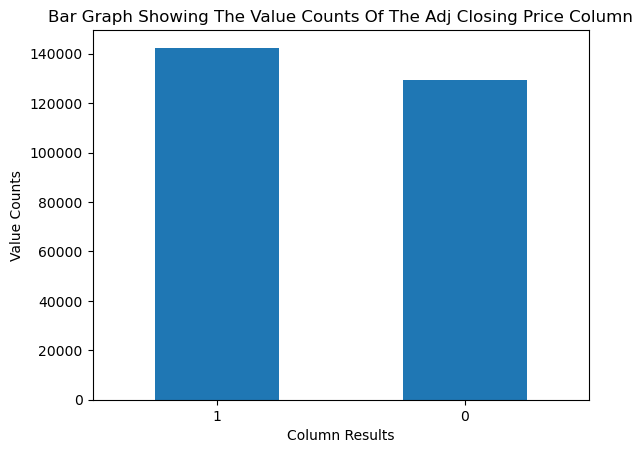

1    0.524314
0    0.475686
Name: Adj Closing Price Change, dtype: float64


In [20]:
# Plot the visualization 

df['Adj Closing Price Change'].value_counts().plot(kind='bar')
plt.xlabel('Column Results')
plt.ylabel('Value Counts')
plt.title('Bar graph showing the value counts of the Adj Closing Price column'.title())
plt.xticks(rotation=0)
plt.show()

print(df['Adj Closing Price Change'].value_counts(normalize=True))

**Observations:** 

- Here we can see that our value counts of our target class from the target column only differs by `4%`. This is a decrease from our previous `aapl_stocks` dataframe that had a difference of `6%`.

- Now that we have our columns set up we can proceed to the modelling process once again. 

Let's convert our dataframe to a CSV file in order to perform our modelling. 

In [21]:
# CSV file before sampling data 

df.to_csv('clean_data.csv', index=False)

---

After running our logistic regression model once again, we realized that through our classification report that one of the classes in target column had less samples than the other. Therefore, what we would need to do is balance the target class out. Apart from down-sampling we will also first look at sampling the data from our main dataset as we want to decrease the computational speed of running the models. Our aim is to get above 10,000 rows in the sample data.  

<a id=2.1></a>
### Data Sampling

In [22]:
# Check the shape of our original dataframe
df.shape

(271679, 8)

In [23]:
# Viewing the first 5 columns
df.head()

,Open,High,Low,Close,Adj Close,Volume,Adj Closing Yday,Adj Closing Price Change
1,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,6.562591,1
2,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,6.573935,0
3,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,6.469369,0
4,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,6.457407,1
5,7.600000,7.607143,7.444643,7.503929,6.442997,462229600,6.500339,0


In [24]:
# Sample 15% of our data 

sample_df = df.sample(frac=0.15).copy()

In [25]:
# Sanity Check 

sample_df.shape

(40752, 8)

<a id=2.1></a>
### Downsample Target Column

In [26]:
# value counts of our target column 

sample_df['Adj Closing Price Change'].value_counts()

1    21584
0    19168
Name: Adj Closing Price Change, dtype: int64

**Observations:** 

- As we can see from the value counts above class `1` has a total of `21350` while class `0` has `19402`. Therefore what we need to do is downsample class `1` to match class `0` so that when we run our models our target class are equal and our classification report will be able to give us better values.   

In [27]:
# Downsample class 1 to equal class 0 

class_0 = sample_df[sample_df['Adj Closing Price Change'] == 0]
class_1 = sample_df[sample_df['Adj Closing Price Change'] == 1]

In [28]:
class_0_count = len(class_0)
class_1_count = len(class_1)

print(f"Class 0: {class_0_count}")
print(f"Class 1: {class_1_count}")

Class 0: 19168
Class 1: 21584


In [29]:
# Determine the desired number of samples for each class
desired_count = class_0_count

# Downsample class 0
downsampled_class_0 = resample(class_0, n_samples=desired_count, random_state=42)

# Downsample class 1
downsampled_class_1 = resample(class_1, n_samples=desired_count, random_state=42)


# Combine the downsampled samples
balanced_dataset = pd.concat([downsampled_class_0, downsampled_class_1])

In [30]:
# Sanity Check 

balanced_dataset['Adj Closing Price Change'].value_counts()

0    19168
1    19168
Name: Adj Closing Price Change, dtype: int64

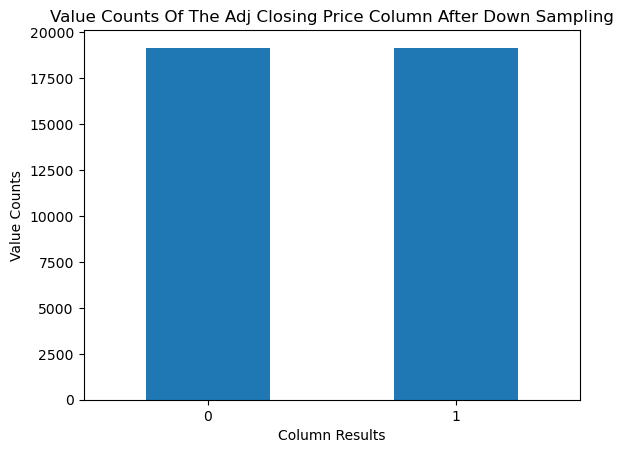

0    0.5
1    0.5
Name: Adj Closing Price Change, dtype: float64


In [31]:
# Plot the visualization 

balanced_dataset['Adj Closing Price Change'].value_counts().plot(kind='bar')
plt.xlabel('Column Results')
plt.ylabel('Value Counts')
plt.title('value counts of the Adj Closing Price column after down sampling'.title())
plt.xticks(rotation=0)
plt.show()

print(balanced_dataset['Adj Closing Price Change'].value_counts(normalize=True))

In [32]:
# Checking the shape of the balanced dataframe 

balanced_dataset.shape

(38336, 8)

In [33]:
# Print the columns and rows 

print(f"Our sample balanced dataframe has a total of {balanced_dataset.shape[0]} rows and {balanced_dataset.shape[1]} columns.")

Our sample balanced dataframe has a total of 38336 rows and 8 columns.


In [34]:
# Drop the columns we do not need 

balanced_dataset = balanced_dataset.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)

In [35]:
# Sanity Check 

balanced_dataset.head()

,Adj Close,Adj Closing Yday,Adj Closing Price Change
146397,18.092905,18.092905,0
16982,66.758507,67.133293,0
166278,56.311829,56.557949,0
208135,66.614342,67.113411,0
50096,259.309998,259.809998,0


We were able to sample from our original dataframe and we also were able to downsample the target class. After having the balanced dataframe we went ahead and dropped the columns we do not require. We now have our dataframe prepared and can convert it to a csv file in order to perform our modelling. 

In [36]:
# CSV file after sampling data - downsampled the target column too and dropped unwanted columns

balanced_dataset.to_csv('sample_balanced_data.csv', index=False)

----

## Conclusion:

----